# Twitter News Sentiment Analysis
##### Observable Trends:
###### 1. The scatter plot shows tweet sentiments of each news source scattered across vader's tweet polarity. As you look closer at news sources individually you can see that some have more positive tweets than negative, or vice versa. 
###### 2. As of March 12th, 2018, BBCNews has the most negative average compound score while CBS has the most positive average compound score out of the 5 news sources analyzed.
###### 3. However, according to the vader sentiment documentation, the average compound scores for these news sources fall in the range of neutral sentiment.

In [30]:
# Dependencies
import json
from pprint import pprint
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from config import (consumer_key, consumer_secret,
                    access_token, access_token_secret)

In [31]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

In [32]:
# Target user
target_list = ['@BBCNews', '@CBS', '@CNN', '@FoxNews', '@nytimes']

# Create list of dictionaries
sentiment = []

tweet_count = 1

for target_user in target_list:
    
    # Paginate through 5 pages
    for x in range(5):
       
        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target_user, page=x)
        
        # Loop through all tweets
        for tweet in public_tweets:
            
            # Grab tweet data
            name = tweet['user']['name']
            tweet_text = tweet['text']
            date = tweet['created_at']
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            positive = results['pos']
            neutral = results['neu']
            negative = results['neg']
            
            # Track tweet count
            tweets_ago = tweet_count
            
            # Create dictionary holding tweet data
            tweet_dict = {'Media Source': name, 'Tweet': tweet_text, 'Date': date, 'Compound': compound, 
                          'Positive': positive, 'Neutral': neutral, 'Negative': negative, 'Tweets Ago': tweet_count}
            
            # Only count up to 100 for each target user
            if tweets_ago == 100:
                # Reset tweet counter
                tweet_count = 1
            else:
                tweet_count += 1
            
            # Append tweet dictionary to sentiment list
            sentiment.append(tweet_dict)

In [33]:
# Create dataframe
media_tweets = pd.DataFrame(sentiment)

# Reorder columns
media_tweets = media_tweets.iloc[:,[2,6,1,0,5,4,3,7]]

# Grab datetime to interpolate into csv name
today = dt.now().strftime('%Y%m%d') 

# Save to csv
media_tweets.to_csv(f'tweet_data/{today}_news_sentiment.csv', encoding='utf-8', index=False)
media_tweets

,Media Source,Tweet,Date,Compound,Positive,Neutral,Negative,Tweets Ago
0,BBC News (UK),RT @BBCSport: Jamie Carragher has apologised f...,Mon Mar 12 20:25:56 +0000 2018,0.1027,0.065,0.935,0.000,1
1,BBC News (UK),Chloe Miazek death: Mark Bruce admits Aberdeen...,Mon Mar 12 19:17:43 +0000 2018,-0.7964,0.133,0.364,0.503,2
2,BBC News (UK),Mesh surgeon removed ovaries without prior con...,Mon Mar 12 19:12:59 +0000 2018,-0.1695,0.000,0.808,0.192,3
3,BBC News (UK),RT @BBCSport: Eddie Jones is open to bringing ...,Mon Mar 12 19:08:15 +0000 2018,-0.4019,0.108,0.677,0.215,4
4,BBC News (UK),Coronation Street unveils new on-set memorial ...,Mon Mar 12 18:45:31 +0000 2018,-0.3182,0.000,0.813,0.187,5
5,BBC News (UK),RT @bbcouch: Why is drinking water so bad for ...,Mon Mar 12 18:34:24 +0000 2018,-0.6696,0.000,0.757,0.243,6
6,BBC News (UK),RT @BBCWorldatOne: A comedy “northern powerhou...,Mon Mar 12 18:28:59 +0000 2018,0.8689,0.366,0.634,0.000,7
7,BBC News (UK),RT @BBCJonSopel: Now that @theresa_may has con...,Mon Mar 12 18:23:43 +0000 2018,-0.5859,0.000,0.840,0.160,8
8,BBC News (UK),Russia reacts to @theresa_may statement on Sal...,Mon Mar 12 17:51:05 +0000 2018,-0.5859,0.000,0.703,0.297,9
9,BBC News (UK),"Salisbury poisoning was ""indiscriminate and re...",Mon Mar 12 17:38:37 +0000 2018,-0.5719,0.138,0.542,0.320,10


In [34]:
# Set media source as index
media_index = media_tweets.set_index(['Media Source'])

# Subset new data for each media source
bbc_sent = media_index.loc['BBC News (UK)',['Compound']]
cbs_sent = media_index.loc['CBS',['Compound']]
cnn_sent = media_index.loc['CNN',['Compound']]
fox_sent = media_index.loc['Fox News',['Compound']]
nyt_sent = media_index.loc['The New York Times',['Compound']]

# Sentiment Analysis of Media Tweets

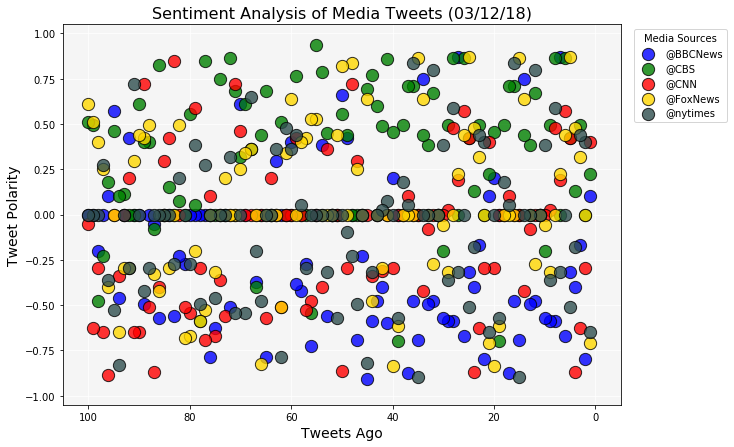

In [35]:
# Set axes
tweets_ago = np.arange(1, 101)
bbc = bbc_sent['Compound']
cbs = cbs_sent['Compound']
cnn = cnn_sent['Compound']
fox = fox_sent['Compound']
nyt = nyt_sent['Compound']

# Set figure size
plt.figure(figsize=(10, 7))

# Plot
bbc_plot = plt.scatter(tweets_ago, bbc, facecolors='b', edgecolors='black', s=150, alpha=0.8, label="@BBCNews")
cbs_plot = plt.scatter(tweets_ago, cbs, facecolors='g', edgecolors='black', s=150, alpha=0.8, label="@CBS")
cnn_plot = plt.scatter(tweets_ago, cnn, facecolors='r', edgecolors='black', s=150, alpha=0.8, label="@CNN")
fox_plot = plt.scatter(tweets_ago, fox, facecolors='gold', edgecolors='black', s=150, alpha=0.8, label="@FoxNews")
nyt_plot = plt.scatter(tweets_ago, nyt, facecolors='darkslategray', edgecolors='black', s=150, alpha=0.8, label="@nytimes")

# Set limits
plt.xlim(105, -5)
plt.ylim(-1.05, 1.05)

# Set axes background color
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Insert grid lines and set behind plot elements
ax.grid(color='white')
ax.set_axisbelow(True)

# Specify max number of ticks in x-axis
plt.locator_params(axis='y', numticks=1)

# Get datetime
today = dt.now().strftime('%m/%d/%y')

# Labels
plt.title(f'Sentiment Analysis of Media Tweets ({today})', fontsize=16)
plt.xlabel('Tweets Ago', fontsize=14)
plt.ylabel('Tweet Polarity', fontsize=14)

# Legend
lgd = plt.legend(handles=[bbc_plot, cbs_plot, cnn_plot, fox_plot, nyt_plot], 
                 title='Media Sources', loc=1, bbox_to_anchor=(1.2, 1))

# Format datetime for saving image
today = dt.now().strftime('%Y%m%d')

# Save image and show
plt.savefig(f'images/{today}_sent_media_tweets.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

# Overall Media Sentiment Based on Twitter


In [36]:
# Group by media source
media_group = media_tweets.groupby(['Media Source'])

# Grab mean of compound sentiment values
avg_comp = media_group['Compound'].mean()

# Convert to dataframe
media_sent = pd.DataFrame({'Average Compound': avg_comp})

# Reset index
media_sent = media_sent.reset_index()
media_sent

,Media Source,Average Compound
0,BBC News (UK),-0.183014
1,CBS,0.289191
2,CNN,-0.082892
3,Fox News,0.051733
4,The New York Times,-0.049292


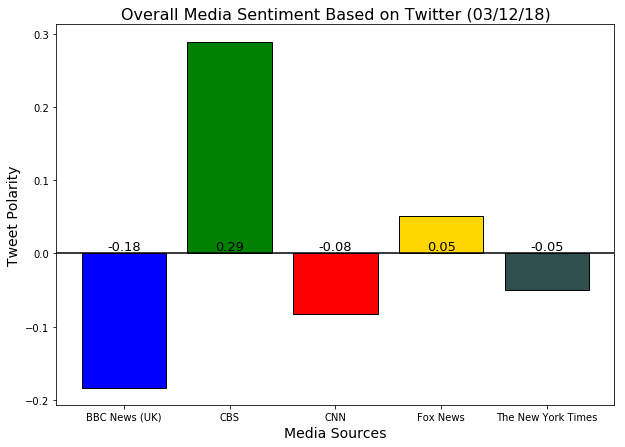

In [37]:
# Set axes
x_axis = np.arange(len(media_sent['Media Source']))
compound_sent = media_sent['Average Compound']

# Set figure size
plt.figure(figsize=(10, 7))

# color=tum_vol_chg['Positive?'].map({True: 'r', False: 'g'})
# Set bar colors
colors = {"BBC News (UK)": "b", "CBS": "g", "CNN": "r", 
          "Fox News": "gold", "The New York Times": "darkslategray"}


# Plot bars
sent_bar = plt.bar(x_axis, compound_sent, color=media_sent['Media Source'].map(colors), 
                  edgecolor='black', alpha=1, align="edge")

# Place tick locations and label
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC News (UK)", "CBS", "CNN", "Fox News", "The New York Times"])

# Set the x and y limits
#plt.xlim(-0.25, len(x_axis))
#plt.ylim(-25, max(drucompound_sent))

# Draw horizontal line
plt.axhline(y=0, xmin=0, xmax=1, linestyle='-', color='black')

# Get datetime
today = dt.now().strftime('%m/%d/%y')

# Labels
plt.title(f'Overall Media Sentiment Based on Twitter ({today})', fontsize=16)
plt.xlabel('Media Sources', fontsize=14)
plt.ylabel('Tweet Polarity', fontsize=14)

# Insert grid lines and set behind plot elements
# ax = plt.gca()
# ax.grid(linestyle='--')
# ax.grid(color='black', alpha=0.7)
# ax.set_axisbelow(True)

# Annotate bars
perc_tum_vol_chg = [f'{chg:.2f}' for chg in compound_sent]
for i, rect in enumerate(sent_bar):
    height = 0
    plt.text(rect.get_x() + rect.get_width()/2.0, height, perc_tum_vol_chg[i], 
             color='black', fontsize='13', ha='center', va='bottom')

# Format datetime for saving image
today = dt.now().strftime('%Y%m%d')    

# Save and show
plt.savefig(f'images/{today}_sent_media_overall.png')
plt.show()